# **Tensor**

| Ordo Tensor | Nama        | Bentuk Dimensi         | Contoh                         |
|-------------|-------------|-------------------------|--------------------------------|
| Ordo 0      | Skalar      | 1 angka | `a = 5`                        |
| Ordo 1      | Vektor      | `(n,)`                  | `v = [1, 2, 3]`                |
| Ordo 2      | Matriks     | `(m, n)`                | `M = [[1, 2], [3, 4]]`         |
| Ordo 3      | Tensor 3D   | `(k, m, n)`             | Beberapa matriks ditumpuk jadi kubus        |
| Ordo 4+     | Tensor 4D++ | `(l, k, m, n)` dst      | Batch data gambar/video     |

In [ ]:
import tensorflow as tf

x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

print(x)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)


In [ ]:
x + 2

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[3., 4., 5.],
       [6., 7., 8.]], dtype=float32)>

In [ ]:
print(x * 2)
print(x @ tf.transpose(x))

tf.Tensor(
[[ 2.  4.  6.]
 [ 8. 10. 12.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[14. 32.]
 [32. 77.]], shape=(2, 2), dtype=float32)


Softmax adalah fungsi yang mengubah vektor bilangan real menjadi vektor probabilitas.

In [ ]:
tf.nn.softmax(x, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.66524094],
       [0.09003057, 0.24472848, 0.66524094]], dtype=float32)>

# **Atribut**

**Layer**

| No | Layer              | Kategori             | Fungsi Umum                                                                 | Contoh Penggunaan                                  |
|----|--------------------------|-----------------------|------------------------------------------------------------------------------|-----------------------------------------------------|
| 1  | `Dense`                 | Fully Connected       | Layer terhubung penuh. Digunakan hampir di semua model neural network.      | Output layer klasifikasi atau regresi              |
| 2  | `Activation`           | Aktivasi              | Menambahkan fungsi aktivasi secara eksplisit.                               | Aktivasi non-linear (ReLU, sigmoid, dsb)           |
| 3  | `Dropout`              | Regularization        | Mencegah overfitting dengan menonaktifkan neuron secara acak saat training. | Model training agar tidak overfit                  |
| 4  | `Flatten`              | Reshaping             | Mengubah tensor menjadi vektor 1D.                                          | Dari output CNN ke Dense layer                     |
| 5  | `Input`                | Input Layer           | Mendefinisikan bentuk input dalam model Functional API.                     | Awal dari model dalam pendekatan functional         |
| 6  | `Conv2D`               | Convolution           | Ekstraksi fitur dari gambar.                                                | Model CNN untuk pengenalan citra                   |
| 7  | `MaxPooling2D`         | Pooling               | Mengurangi ukuran fitur map, mempertahankan fitur penting.                  | Setelah Conv2D untuk downsampling                  |
| 8  | `BatchNormalization`   | Normalization         | Menstabilkan dan mempercepat pelatihan.                                     | Setelah Conv2D atau Dense                          |
| 9  | `LSTM`                 | Recurrent             | Mengingat urutan data dalam jangka panjang.                                 | Time series, NLP, prediksi urutan                  |
| 10 | `Embedding`            | NLP                   | Mengubah kata (indeks) jadi vektor makna.                                   | Model teks seperti sentiment analysis              |
| 11 | `Concatenate`          | Merging               | Menggabungkan beberapa tensor (fitur).                                      | Model dengan input atau output lebih dari satu     |
| 12 | `Reshape`              | Reshaping             | Mengubah bentuk tensor tanpa mengubah datanya.                              | Membentuk ulang input ke format yang diinginkan    |


| **Kategori Fungsi**           | **Contoh Layer**                                        | **Fungsi**                                                                 |
|-------------------------------|----------------------------------------------------------|----------------------------------------------------------------------------|
| **1. Input Layer**            | `Input()`                                               | Menentukan bentuk (shape) data yang masuk ke model.                       |
| **2. Ekstraksi Fitur**        | `Conv1D`, `Conv2D`, `Conv3D`, `LSTM`, `GRU`, `Embedding` | Mengambil pola atau informasi penting dari data (fitur).                 |
| **3. Reduksi Dimensi**        | `MaxPooling1D/2D`, `AveragePooling1D/2D`, `Flatten`      | Menyaring informasi penting & mengurangi ukuran data.                    |
| **4. Normalisasi / Regularisasi** | `BatchNormalization`, `Dropout`                           | Menstabilkan pelatihan dan mencegah overfitting.                         |
| **5. Fully Connected Layer**  | `Dense`                                                 | Pengambilan keputusan berdasarkan fitur hasil ekstraksi.                 |
| **6. Gabungan / Percabangan** | `Concatenate`, `Add`, `Multiply`                        | Menggabungkan atau mengolah banyak jalur input/output.                   |
| **7. Output Layer**           | `Dense(activation='softmax'/'sigmoid'/None)`           | Menghasilkan prediksi akhir dari model.                                  |


| Code          | Arti                                | Contoh Input        | Bentuk Tensor           |
|--------------------|--------------------------------------|---------------------|--------------------------|
| `shape=()`   | Skalar (angka tunggal)               | `5.0`               | `(batch_size,)`         |
| `shape=(1,)` | Vektor 1D dengan 1 elemen            | `[5.0]`             | `(batch_size, 1)`       |
| `shape=(2,)` | Vektor 1D dengan 2 elemen            | `[5.0, 3.0]`        | `(batch_size, 2)`       |
| `shape=(2,2)`| Matriks 2x2                          | `[[1, 2], [3, 4]]`  | `(batch_size, 2, 2)`    |
| `shape=(n,n)` | Matriks nxn | | |

**Model**

| **Model**          | **Spesifikasi**                                                                                                                                 | **Cara Kerja**                                                                                                                                 | **Spesialis Data**                                                                                              |
|--------------------|-------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| **CNN**            | - Fokus pada data gambar<br>- Menggunakan lapisan konvolusi dan pooling<br>- Arsitektur sangat dalam dengan filter yang dapat belajar fitur | Mengekstraksi fitur lokal dari gambar melalui konvolusi, dan mereduksi dimensi gambar dengan pooling, diikuti dengan lapisan fully connected.     | - Gambar<br>- Video<br>- Data dengan struktur spasial (seperti citra medis, deteksi objek, pengenalan wajah) |
| **RNN**            | - Fokus pada data urutan<br>- Menggunakan memori internal untuk menangkap ketergantungan dalam urutan                                       | Memproses input dalam urutan waktu, dengan informasi yang berulang antara langkah-langkah waktu untuk menangkap pola urutan.                    | - Teks<br>- Deret waktu<br>- Suara                                                                                 |
| **LSTM**           | - Varian RNN yang mengatasi vanishing gradient<br>- Menggunakan tiga gerbang (input, forget, output) untuk kontrol memori                   | Menggunakan gating untuk mengontrol aliran informasi dan memungkinkan penyimpanan informasi jangka panjang.                                      | - Teks panjang<br>- Deret waktu panjang<br>- Analisis suara atau sekuens panjang                                    |
| **GAN**            | - Dua model: generator dan discriminator<br>- Menghasilkan data baru mirip data asli                                                           | Generator membuat data palsu, sementara discriminator membedakan antara data palsu dan asli, berkompetisi untuk meningkatkan kinerja mereka.   | - Gambar sintetik<br>- Musik<br>- Video<br>- Data generatif lainnya (misal, desain, seni)                           |
| **Autoencoders**   | - Digunakan untuk reduksi dimensi dan rekonstruksi<br>- Dikenal dengan encoder dan decoder                                                     | Encoder mengompresi data menjadi representasi lebih kecil, sedangkan decoder berusaha merekonstruksi data asli dari representasi tersebut.      | - Gambar<br>- Suara<br>- Data berbentuk numerik atau teks yang perlu dikompresi                                  |
| **Transformer**    | - Arsitektur berbasis self-attention<br>- Digunakan untuk urutan panjang<br>- Banyak digunakan di NLP                                         | Memproses seluruh input secara paralel dengan self-attention untuk menangkap hubungan antar kata dalam urutan yang sangat panjang.             | - Teks panjang<br>- Penerjemahan bahasa<br>- Pemrosesan bahasa alami lainnya (misalnya BERT, GPT)                |
| **GRU**            | - Varian dari RNN yang lebih sederhana dan efisien<br>- Menggunakan dua gerbang (update, reset)                                                | Menggunakan dua gerbang untuk mengontrol memori dan memperbaiki masalah vanishing gradient pada urutan waktu.                                    | - Teks<br>- Deret waktu<br>- Analisis urutan waktu yang tidak terlalu panjang                                    |
| **BERT**           | - Model berbasis Transformer<br>- Bidirectional untuk konteks yang lebih baik                                                                 | Memproses input dengan mempertimbangkan konteks dari kiri dan kanan untuk prediksi kata dalam kalimat (masking dan prediksi kalimat berikutnya). | - Teks (NLP)<br>- Penerjemahan<br>- Tugas pemrosesan bahasa alami lainnya seperti analisis sentimen, QA       |
| **ResNet**         | - Jaringan neural sangat dalam dengan residual connections<br>- Digunakan untuk klasifikasi gambar dan deteksi objek                       | Menggunakan residual connections untuk menghindari masalah degradasi performa pada model yang sangat dalam.                                      | - Gambar<br>- Video<br>- Aplikasi visi komputer seperti pengenalan objek atau wajah                           |
| **U-Net**          | - Digunakan untuk segmentasi gambar medis<br>- Memiliki path kontraksi dan ekspansi, dengan skip connections                                  | Mengekstraksi fitur dari gambar dengan path kontraksi, kemudian memperbesar kembali fitur tersebut dengan path ekspansi sambil menjaga detail spasial. | - Gambar medis (CT, MRI)<br>- Segmentasi citra lainnya seperti segmentasi objek dalam gambar satelit          |


**Fungsi Aktivasi**

| **Fungsi**      | **Output**      | **Kelebihan**                                         | **Kekurangan**                         | **Spesialis Data**             | **Kapan Digunakan**                         |
|-----------------|-----------------|------------------------------------------------------|--------------------------------------|-------------------------------|---------------------------------------------|
| **relu**        | [0, ∞)          | Cepat, sederhana, menghindari vanishing gradient     | Bisa menyebabkan dead neuron (output selalu nol) | Tidak perlu distandarisasi    | Hidden layer pada hampir semua model         |
| **Sigmoid**     | (0, 1)          | Output bisa dianggap sebagai probabilitas             | Vanishing gradient, saturasi          | Data ternormalisasi ke [0, 1]  | Output layer klasifikasi biner                |
| **Tanh**        | (-1, 1)         | Output seimbang terhadap nol                           | Bisa mengalami vanishing gradient      | Data distandarisasi ke [-1, 1] | Hidden layer alternatif ReLU                  |
| **Softmax**     | (0, 1), total = 1 | Cocok untuk output multi-kelas (distribusi probabilitas) | Tidak cocok untuk klasifikasi biner  | Label output dalam bentuk one-hot | Output layer klasifikasi multi-kelas          |
| **Leaky ReLU**  | (-∞, ∞)         | Atasi dead neuron, tetap ada output untuk nilai negatif | Masih relatif sederhana               | Sama seperti ReLU             | Hidden layer, alternatif ReLU                 |
| **ELU**         | (-α, ∞)         | Lebih halus dari ReLU, menghindari dead neuron        | Perhitungan sedikit lebih lambat      | Data dengan distribusi normal/simetri | Hidden layer                              |
| **Swish**       | ~(-0.3, ∞)      | Smooth, performa baik di model kompleks                | Lebih rumit dan lambat                | Tidak perlu scaling khusus     | Hidden layer pada model besar (NLP, CV)      |
| **Linear**      | (-∞, ∞)         | Output langsung, mudah dihitung, tanpa non-linearitas | Tidak bisa memodelkan hubungan non-linear | Data kontinu, tidak perlu transformasi khusus | Output layer regresi, data kontinu            |
| **Hard Sigmoid**| (0, 1)          | Versi lebih sederhana dan cepat dari sigmoid          | Kurang halus dibanding sigmoid biasa | Data ternormalisasi ke [0, 1]  | Alternatif sigmoid di model dengan resource terbatas |
| **GELU**        | (-∞, ∞)         | Smooth, probabilistik, performa baik                   | Lebih kompleks dari ReLU              | Model NLP modern              | Hidden layer khusus NLP dan transformer       |
| **PReLU**       | (-∞, ∞)         | Mirip Leaky ReLU tapi parameter slope bisa belajar     | Lebih kompleks                       | Sama seperti ReLU             | Hidden layer, model yang ingin belajar aktivasi |


**Optimizer**

| **Optimizer** | **Kelebihan** | **Kekurangan** | **Spesialisasi Data** | **Kapan Digunakan** |
|--------------------|----------------|----------------|------------------------|----------------------|
| **SGD** | Sederhana, efisien, dapat dikendalikan dengan learning rate kecil | Konvergensi lambat, sensitif terhadap local minima | Dataset besar & tidak terlalu kompleks | Saat ingin kontrol penuh terhadap proses training |
| **SGD + Momentum** | Mempercepat konvergensi, menghindari local minima | Masih perlu tuning learning rate & momentum | Data yang bervariasi tinggi (fluktuatif) | Saat SGD terlalu lambat atau terjebak |
| **RMSprop** | Adaptif terhadap perubahan gradien, cepat | Tidak selalu stabil, hasil tergantung parameter | Data dengan noise tinggi, time series | RNN, data sekuensial, sinyal |
| **Adagrad** | Adaptif terhadap fitur jarang muncul | Learning rate bisa terlalu kecil seiring waktu | Dataset dengan fitur sparse (TF-IDF, NLP) | NLP, teks, embedding |
| **Adadelta** | Perbaikan dari Adagrad, tidak perlu tentukan learning rate awal | Bisa kurang optimal dibanding Adam | Dataset bervariasi sedang | Alternatif jika Adagrad tidak stabil |
| **Adam** | Kombinasi terbaik dari RMSprop dan momentum, cepat dan stabil | Memori besar, bisa terlalu adaptif | Dataset besar, noisy, kompleks | Optimizer default terbaik untuk hampir semua kasus |
| **AdamW** | Performa seperti Adam + weight decay lebih baik | Sedikit lebih rumit dari Adam biasa | Model dengan regularisasi tinggi | Saat overfitting dan butuh weight decay |
| **Nadam** | Adam + Nesterov momentum, lebih cepat konvergensi | Sedikit lebih lambat dari AdamW di GPU | Dataset sangat kompleks | Model deep atau sangat dalam |


**Fungsi Loss**

| **Fungsi**                  | **Kelebihan**                                                                                                                                      | **Kekurangan**                                                                                                                                                    | **Spesifikasi**                                          | **Data Optimal**                                       |
|------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------|--------------------------------------------------------|
| **Mean Squared Error (MSE)**       | - Sederhana dan mudah dipahami<br>- Cocok untuk regresi<br>- Menghukum kesalahan besar lebih keras                                                   | - Sensitif terhadap outlier<br>- Memberikan penalti besar terhadap prediksi yang jauh dari target                                                            | Untuk regresi dengan target kontinu                    | Data numerik kontinu seperti harga atau prediksi suhu |
| **Mean Absolute Error (MAE)**      | - Tidak sensitif terhadap outlier<br>- Lebih tahan terhadap kesalahan besar dibanding MSE                                                            | - Lebih sulit untuk digunakan dalam model yang sangat sensitif terhadap perubahan kecil<br>- Kurang sensitif terhadap prediksi yang sangat dekat dengan target | Untuk regresi dengan target kontinu                    | Data numerik kontinu yang memiliki sedikit outlier     |
| **Binary Crossentropy**            | - Cocok untuk klasifikasi biner<br>- Sangat umum dipakai dalam masalah klasifikasi biner                                                               | - Tidak dapat digunakan untuk masalah klasifikasi lebih dari dua kelas                                                                                          | Untuk klasifikasi biner (dua kelas)                     | Data biner (0 dan 1) seperti deteksi penyakit atau spam|
| **Categorical Crossentropy**       | - Cocok untuk klasifikasi multi-kelas dengan one-hot encoding<br>- Dapat menangani lebih dari dua kelas                                               | - Memerlukan one-hot encoding untuk label<br>- Kurang efisien pada masalah dengan kelas banyak yang jarang muncul                                                 | Untuk klasifikasi multi-kelas (one-hot encoding)        | Data dengan banyak kategori, seperti klasifikasi gambar |
| **Sparse Categorical Crossentropy**| - Tidak memerlukan one-hot encoding untuk label<br>- Efisien untuk klasifikasi dengan banyak kelas                                                     | - Label yang digunakan harus berupa integer<br>- Tidak cocok untuk klasifikasi dengan label one-hot                                                              | Untuk klasifikasi multi-kelas (label integer)           | Data dengan label integer, seperti teks atau klasifikasi objek|
| **Huber Loss**                     | - Kombinasi antara MSE dan MAE, mengurangi penalti besar pada outlier<br>- Lebih stabil daripada MSE                                                   | - Tidak cocok untuk data yang sangat noise<br>- Penyesuaian parameter delta yang sulit ditemukan                                                                  | Untuk regresi dengan data yang sedikit outlier          | Data regresi yang memiliki beberapa outlier             |
| **Kullback-Leibler Divergence**    | - Cocok untuk masalah distribusi probabilitas dan pengukuran jarak antar distribusi<br>- Sering digunakan untuk model generatif (seperti VAE)       | - Dapat memberikan nilai tak terhingga jika ada probabilitas 0 dalam distribusi<br>- Memerlukan distribusi yang valid dan dapat dihitung                          | Untuk model probabilistik dan distribusi statistik       | Data distribusi probabilitas seperti pada NLP atau GAN |


**Metrik**

| **Metrik**                | **Fungsi**                                                                 | **Kelebihan**                                                                 | **Kekurangan**                                                                 | **Spesifikasi**                                                                 |
|--------------------------|------------------------------------------------------------------------------|--------------------------------------------------------------------------------|---------------------------------------------------------------------------------|-------------------------------------------------------------------------------------|
| **accuracy**             | Mengukur proporsi prediksi yang benar secara umum                          | Mudah dipahami dan digunakan                                                  | Tidak cocok untuk data tidak seimbang                                           | Klasifikasi biner atau multi-kelas seimbang                                        |
| **binary_accuracy**      | Akurasi klasifikasi biner                                                  | Tepat untuk masalah 2 kelas dengan output sigmoid                             | Tidak bisa digunakan untuk multi-kelas                                          | Klasifikasi biner                                                                  |
| **categorical_accuracy** | Akurasi untuk klasifikasi multi-kelas (label one-hot)                      | Kompatibel dengan one-hot encoding                                            | Tidak cocok jika label dalam bentuk integer                                     | Klasifikasi multi-kelas dengan one-hot label                                       |
| **sparse_categorical_accuracy** | Akurasi multi-kelas dengan label integer                           | Tidak perlu one-hot encoding                                                  | Tidak bisa dipakai jika label one-hot                                           | Klasifikasi multi-kelas dengan label integer                                       |
| **top_k_categorical_accuracy**  | Akurasi jika label termasuk top-k prediksi terbaik                 | Cocok untuk masalah banyak kelas (misal 1000 kelas)                           | Lebih kompleks dan tidak selalu dibutuhkan                                      | Klasifikasi multi-kelas dengan banyak kelas (misalnya ImageNet)                   |
| **AUC**                  | Mengukur kemampuan memisahkan kelas positif dan negatif                    | Sangat berguna untuk data tidak seimbang                                      | Perhitungan kompleks, kurang intuitif bagi pemula                               | Klasifikasi biner dengan distribusi kelas tidak seimbang                          |
| **Precision**            | Proporsi prediksi positif yang benar                                       | Penting saat false positive harus diminimalkan                                | Tidak memperhatikan false negative                                              | Deteksi spam, penyakit langka (FP harus rendah)                                   |
| **Recall**               | Proporsi kelas positif yang berhasil ditemukan                             | Penting saat false negative harus diminimalkan                                | Bisa menghasilkan banyak false positive                                         | Deteksi kanker (FN harus rendah)                                                  |
| **MeanSquaredError (MSE)**      | Rata-rata kuadrat selisih prediksi dan label (untuk regresi)       | Sensitif terhadap outlier, umum digunakan                                     | Outlier bisa sangat memengaruhi hasil                                           | Masalah regresi (misalnya prediksi harga)                                         |
| **MeanAbsoluteError (MAE)**     | Rata-rata nilai absolut selisih prediksi dan label                 | Tidak terlalu dipengaruhi outlier                                             | Kurang peka terhadap perubahan besar dibanding MSE                              | Regresi, ketika outlier tidak dominan                                             |
| **RootMeanSquaredError (RMSE)** | Akar dari MSE                                                     | Mudah diinterpretasi karena satuan sama seperti target                        | Sangat sensitif terhadap outlier                                                | Regresi, ketika kesalahan besar perlu ditekan                                     |
| **MAPE**                 | Mean Absolute Percentage Error                                             | Relatif terhadap ukuran data (presentase)                                     | Tidak cocok jika target = 0                                                     | Regresi bisnis (misalnya prediksi penjualan, keuntungan, dll)                     |

**Leraning rate**

 Ukuran seberapa besar langkah model saat memperbarui bobot selama training

1. **Fixed Learning Rate** : Nilai tetap

In [ ]:
optimezer = Adam(learning_rate=0.001)

2. **Step Decay** : Dikurangi secara bertahap setelah sejumlah epoch tertentu

In [ ]:
def step_decay(epoch):
  return 0.01 * (0.5 ** (epoch // 10))

lr_schedule = LearningRateScheduler(step_decay)
optimizer = Adam(learning_rate=lr_schedule)

3. **Exponential Decay** : Menurun secara eksponensial

In [ ]:
lr_schedule = ExponentialDecay(initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)

4. **Reduce On Plateau** : Menurunkan learning rate jika metrik validasi stagnan

In [ ]:
reduc_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
optimizer = Adam(learning_rate=reduc_lr)

5. **Cyclical Learning Rate (CLR)** : Leraning rate naik turun dalam pola siklus

In [ ]:
clr = tfa.optimizers.CyclicalLearningRate(initial_learning_rate=1e-4, maximal_learning_rate=1e-2, step_size=2000)
optimizer = Adam(learning_rate=clr)

**Callbacks**


Fungsi otomatis yang berjalan saat pelatihan model

1. **EarlyyStopping** : Mengehentikan traning jika model tidak membaik setelah beberapa epoch. Untuk menghindari overfitting dan hemat waktu

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

2. **ModelCheckpoint** : Menyimpan model otomatis saat performa membaik saat parameternya naik

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

`model.fit(...., callbacks = [early_stop, checkpoint])`

- EarlyStopping : Hentikan jika stagnan
- ModelCheckpoint = Simpan yang terbaik

# **Struktur Model**

`input_shape=(a,b)` = `tf.ones(x,b)`

**Mengapus Model lama yang menumpuk semua**

In [ ]:
import tensorflow.keras.backend as K
K.clear_session()

**from tensorflow.keras.models import .....**

1. **Sequential**

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten

model = Sequential(
    [
        Dense(10, activation="relu", input_shape=(4, )),
        Dense(5, activation="relu"),
        Dense(2, activation='sigmoid'),
    ]
)

Mendefinisakn layer input secara eksplisist sehingga data mengatur `batch_size (sample yang diterima setiap kali proses)`

In [ ]:
model = Sequential(
    [
        Input(batch_size=5 ,shape=(4, )),
        Dense(10, activation="relu"),
        Dense(5, activation="relu"),
        Dense(2, activation='sigmoid'),
    ]
)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (5, 10)                │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (5, 5)                 │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (5, 2)                 │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117 (468.00 B)

 Trainable params: 117 (468.00 B)

 Non-trainable params: 0 (0.00 B)

Bisa ditambahkan bertahap dengan `add()`


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(Input(shape=(4,)))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(2))

2. **API Fungsional**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

inputs = Input(shape=(4,), name="input_layer")
x = Dense(10, activation="relu", name="layer_1")(inputs)
x = Dense(5, activation="relu", name="layer_2")(x)
outputs = Dense(2, name="layer_3")(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 2)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117 (468.00 B)

 Trainable params: 117 (468.00 B)

 Non-trainable params: 0 (0.00 B)

- **Two-Branch Networks**

Menggabungkan 2 jalur pemrosesan input yang berbeda, lalu hasilnya digabungkan

`Concatenate()` = Mengganbungkan beberapa input berbeda dari proses yang berbeda juga menjadi satu

`input_shape = (n x m)` -> n x m konsep matriks dengan m = fitur   

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate

input_a = Input(shape=(32,))
input_b = Input(shape=(64,))

branch_a = Dense(16, activation='relu')(input_a)
branch_b = Dense(32, activation='relu')(input_b)

merged = Concatenate()([branch_a, branch_b])
output = Dense(10, activation='softmax')(merged)

model = Model(inputs=[input_a, input_b], outputs=output)

In [ ]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 16)        │        528 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 32)        │      2,080 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 48)        │          0 │ dense_9[0][0],    │
│ (Concatenate)       │                   │            │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 10)        │        490 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,098 (12.10 KB)

 Trainable params: 3,098 (12.10 KB)

 Non-trainable params: 0 (0.00 B)

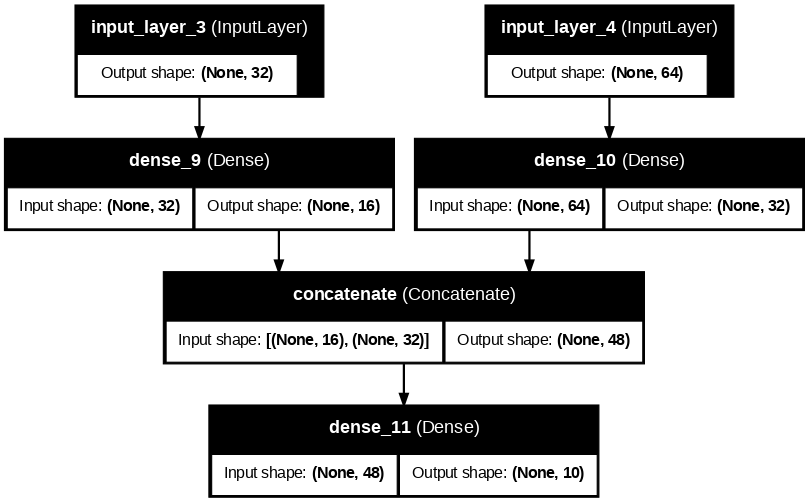

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, dpi=80)

- **Residual Connections**

Menambhakan output dari lapisan sebelumnya kembali ke lapisan yang lebih dalam

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, add

input = Input(shape=(32,))

x = Dense(64, activation='relu')(input)
residual = x

y = Dense(64, activation='relu')(x)
y = add([y, residual])

output = Dense(10, activation='softmax')(y)

model = Model(inputs=input, outputs=output)

In [ ]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 64)        │      2,112 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │      4,160 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 64)        │          0 │ dense_13[0][0],   │
│                     │                   │            │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 10)        │        650 │ add[0][0]         │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,922 (27.04 KB)

 Trainable params: 6,922 (27.04 KB)

 Non-trainable params: 0 (0.00 B)

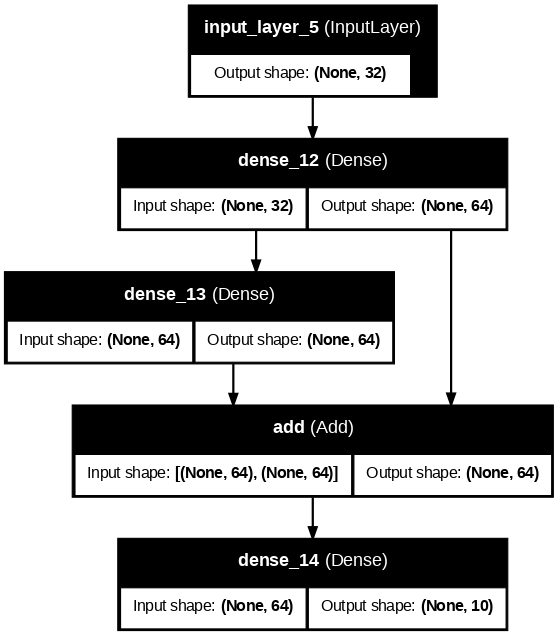

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, dpi=80)

- **Multihead Networks**

 model menghasilkan beberapa output berbeda secara paralel dari satu input yang sama atau dari fitur yang sama.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Input layer
input_layer = Input(shape=(64,))

# Shared layers
shared = Dense(128, activation='relu')(input_layer)
shared = Dense(64, activation='relu')(shared)

# Head 1 - klasifikasi 10 kelas
head1 = Dense(32, activation='relu')(shared)
output1 = Dense(10, activation='softmax', name='class_output')(head1)

# Head 2 - regresi (nilai kontinu)
head2 = Dense(16, activation='relu')(shared)
output2 = Dense(1, activation='linear', name='regression_output')(head2)

# Model multi-output
model = Model(inputs=input_layer, outputs=[output1, output2])

In [ ]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 128)       │      8,320 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 64)        │      8,256 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 32)        │      2,080 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 16)        │      1,040 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ class_output        │ (None, 10)        │        330 │ dense_17[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regression_output   │ (None, 1)         │         17 │ dense_18[0][0]    │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,043 (78.29 KB)

 Trainable params: 20,043 (78.29 KB)

 Non-trainable params: 0 (0.00 B)

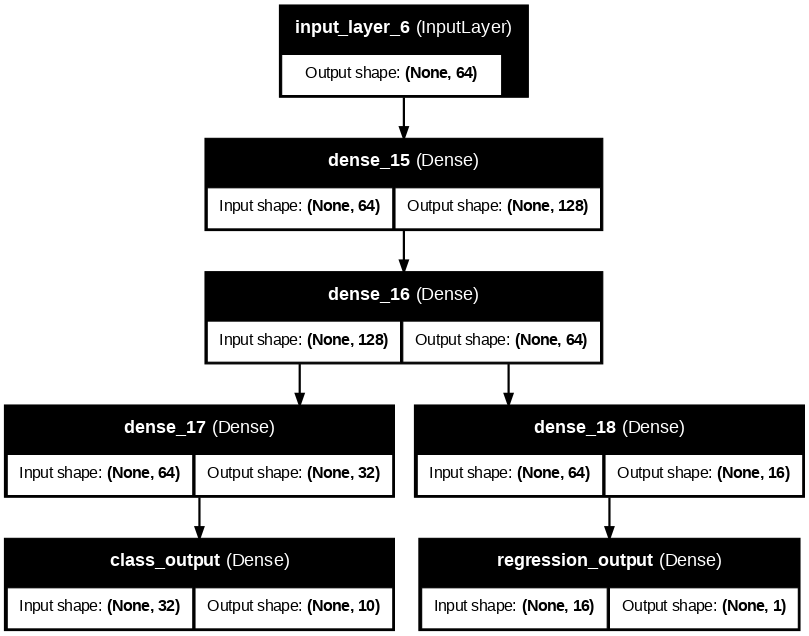

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, dpi=80)

3. **Object-Oriented Programming (OOP)**

**Struktur :**
1. `__init__(self)`
- Konstruktor yang dipanggil saat objek dibuat.
- Digunakan untuk mendefinisikan dan menginisialisasi layer-layer sebagai properti dari class.
- Layer disimpan sebagai atribut agar bisa otomatis di-train dan di-save oleh TensorFlow.
2. `call(self, inputs)`
- Merupakan forward pass dari model.
- Di sinilah Anda mendefinisikan bagaimana input mengalir melalui model.
- Bisa mencakup branching, penggabungan layer, loop, dsb.
3. Custom Training & Testing Loops (Opsional)
- `train_step(self, data)`
- `test_step(self, data)`
- `predict_step(self, data)`

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        # Definisi layer sebagai atribut
        self.dense1 = Dense(2, activation='relu')
        self.dense2 = Dense(3, activation='relu')
        self.dense3 = Dense(4, activation='sigmoid')

    def call(self, inputs):
        # Definisi forward pass
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)

# Buat instance model
model = MyModel()

# Panggil model dengan data dummy agar layer terbangun
dummy_input = tf.random.normal([2, 3])  # Sama seperti input_shape=(5, 2, 3)
output = model(dummy_input)

In [ ]:
model.summary()

Model: "my_model_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (2, 2)                 │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (2, 3)                 │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (2, 4)                 │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

# **Tingkatan**

**Sederhana**

In [ ]:
# Arsitektur model sederhana
model_simple = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Untuk dataset seperti MNIST
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),  # Mencegah overfitting
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 kelas untuk klasifikasi
])

# Kompilasi model
model_simple.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

**Menegah**

In [ ]:
# Arsitektur model menengah (CNN)
model_medium = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Untuk CIFAR-10
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout lebih besar untuk mencegah overfitting
    layers.Dense(10, activation='softmax')  # 10 kelas
])

# Kompilasi model
model_medium.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

**Advanced**

Struktur Functional API

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Add, Reshape, Conv1D, MaxPooling1D, Flatten, Concatenate, MultiHeadAttention

# Definisikan input
inputs1 = Input(shape=(3,), name='input1')  # Input pertama
inputs2 = Input(shape=(4,), name='input2')  # Input kedua

# Branch 1: Proses input1 dengan Dense dan BatchNorm
x1 = Dense(64, activation='relu', name='dense1_branch1')(inputs1)
x1 = BatchNormalization(name='bn1_branch1')(x1)
x1 = Dropout(0.3, name='dropout1_branch1')(x1)
x1_residual = Dense(64, activation='relu', name='dense_residual_branch1')(x1)

# Residual connection untuk branch 1
x1 = Add(name='residual_add_branch1')([x1, x1_residual])
x1 = Dense(32, activation='relu', name='dense2_branch1')(x1)

# Branch 2: Proses input2 dengan Conv1D untuk menangkap pola lokal
x2 = Reshape((4, 1), name='reshape_branch2')(inputs2)  # Reshape untuk Conv1D
x2 = Conv1D(filters=32, kernel_size=2, activation='relu', padding='same', name='conv1_branch2')(x2)
x2 = BatchNormalization(name='bn1_branch2')(x2)
x2 = MaxPooling1D(pool_size=2, name='maxpool_branch2')(x2)
x2 = Flatten(name='flatten_branch2')(x2)
x2 = Dense(64, activation='relu', name='dense1_branch2')(x2)
x2 = Dropout(0.3, name='dropout1_branch2')(x2)

# Branch tambahan untuk input2: Proses paralel dengan Dense
x2_parallel = Dense(48, activation='relu', name='dense_parallel_branch2')(inputs2)
x2_parallel = BatchNormalization(name='bn_parallel_branch2')(x2_parallel)

# Gabungkan x2 dan x2_parallel
x2_merged = Concatenate(name='concat_parallel_branch2')([x2, x2_parallel])

# Gabungkan branch 1 dan branch 2
merged = Concatenate(name='concat_main')([x1, x2_merged])

# Tambahkan Attention mechanism
merged_reshaped = Reshape((1, merged.shape[-1]), name='reshape_attention')(merged)
attention = MultiHeadAttention(num_heads=4, key_dim=32, name='attention')(merged_reshaped, merged_reshaped)
attention = Flatten(name='flatten_attention')(attention)

# Proses lebih lanjut dengan Dense layers
x = Dense(128, activation='relu', name='dense_post_attention')(attention)
x = BatchNormalization(name='bn_post_attention')(x)
x = Dropout(0.4, name='dropout_post_attention')(x)

# Residual connection setelah attention
x_residual = Dense(128, activation='relu', name='dense_residual_post')(x)
x = Add(name='residual_add_post')([x, x_residual])

# Output layer
outputs = Dense(1, activation='sigmoid', name='output')(x)

# Buat model
model = Model(inputs=[inputs1, inputs2], outputs=outputs, name='complex_model')

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# Konfigurasi model.compile versi advanced
optimizer = Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8,
    clipnorm=1.0  # Gradient clipping untuk stabilitas pelatihan
)

loss = CategoricalCrossentropy(label_smoothing=0.1)  # Label smoothing untuk regularisasi

metrics = [
    'accuracy',
    Precision(name='precision'),
    Recall(name='recall'),
    AUC(name='auc')  # Metrik tambahan untuk evaluasi performa
]

# Kompilasi model
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics
)

# Callbacks untuk pelatihan canggih
callbacks = [
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='best_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

In [ ]:
model.summary(line_length=110)

Model: "complex_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                   ┃ Output Shape              ┃          Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input2 (InputLayer)            │ (None, 4)                 │                0 │ -                          │
├────────────────────────────────┼───────────────────────────┼──────────────────┼────────────────────────────┤
│ reshape_branch2 (Reshape)      │ (None, 4, 1)              │                0 │ input2[0][0]               │
├────────────────────────────────┼───────────────────────────┼──────────────────┼────────────────────────────┤
│ input1 (InputLayer)            │ (None, 3)                 │                0 │ -                          │
├────────────────────────────────┼───────────────────────────┼──────────────────┼────────────────────────────┤
│ conv1_branch2 (Conv1D)         │ (None, 4, 32)             │               96 │ reshape_branch2[0][0]      │
├────────────────────────────────┼───────────────────────────┼──────────────────┼────────────────────────────┤
│ dense1_branch1 (Dense)         │ (None, 64)                │              256 │ input1[0][0]               │
├────────────────────────────────┼───────────────────────────┼──────────────────┼────────────────────────────┤
│ bn1_branch2                    │ (None, 4, 32)             │              128 │ conv1_branch2[0][0]        │
│ (BatchNormalization)           │                           │                  │                            │
├────────────────────────────────┼───────────────────────────┼──────────────────┼────────────────────────────┤
│ bn1_branch1                    │ (None, 64)                │              256 │ dense1_branch1[0][0]       │
│ (BatchNormalization)           │                           │                  │                            │
├────────────────────────────────┼───────────────────────────┼──────────────────┼────────────────────────────┤
│ maxpool_branch2 (MaxPooling1D) │ (None, 2, 32)             │                0 │ bn1_branch2[0][0]          │
├────────────────────────────────┼───────────────────────────┼──────────────────┼────────────────────────────┤
│ dropout1_branch1 (Dropout)     │ (None, 64)                │                0 │ bn1_branch1[0][0]          │
├────────────────────────────────┼───────────────────────────┼──────────────────┼────────────────────────────┤
│ flatten_branch2 (Flatten)      │ (None, 64)                │                0 │ maxpool_branch2[0][0]      │
├────────────────────────────────┼───────────────────────────┼──────────────────┼────────────────────────────┤
│ dense_residual_branch1 (Dense) │ (None, 64)                │            4,160 │ dropout1_branch1[0][0]     │
├────────────────────────────────┼───────────────────────────┼──────────────────┼────────────────────────────┤
│ dense1_branch2 (Dense)         │ (None, 64)                │            4,160 │ flatten_branch2[0][0]      │
├────────────────────────────────┼───────────────────────────┼──────────────────┼────────────────────────────┤
│ dense_parallel_branch2 (Dense) │ (None, 48)                │              240 │ input2[0][0]               │
├────────────────────────────────┼───────────────────────────┼──────────────────┼────────────────────────────┤
│ residual_add_branch1 (Add)     │ (None, 64)                │                0 │ dropout1_branch1[0][0],    │
│                                │                           │                  │ dense_residual_branch1[0]… │
├────────────────────────────────┼───────────────────────────┼──────────────────┼────────────────────────────┤
│ dropout1_branch2 (Dropout)     │ (None, 64)                │                0 │ dense1_branch2[0][0]       │
├────────────────────────────────┼───────────────────────────┼──────────────────┼────────────────────────────┤
│ bn

 Total params: 121,537 (474.75 KB)

 Trainable params: 120,993 (472.63 KB)

 Non-trainable params: 544 (2.12 KB)

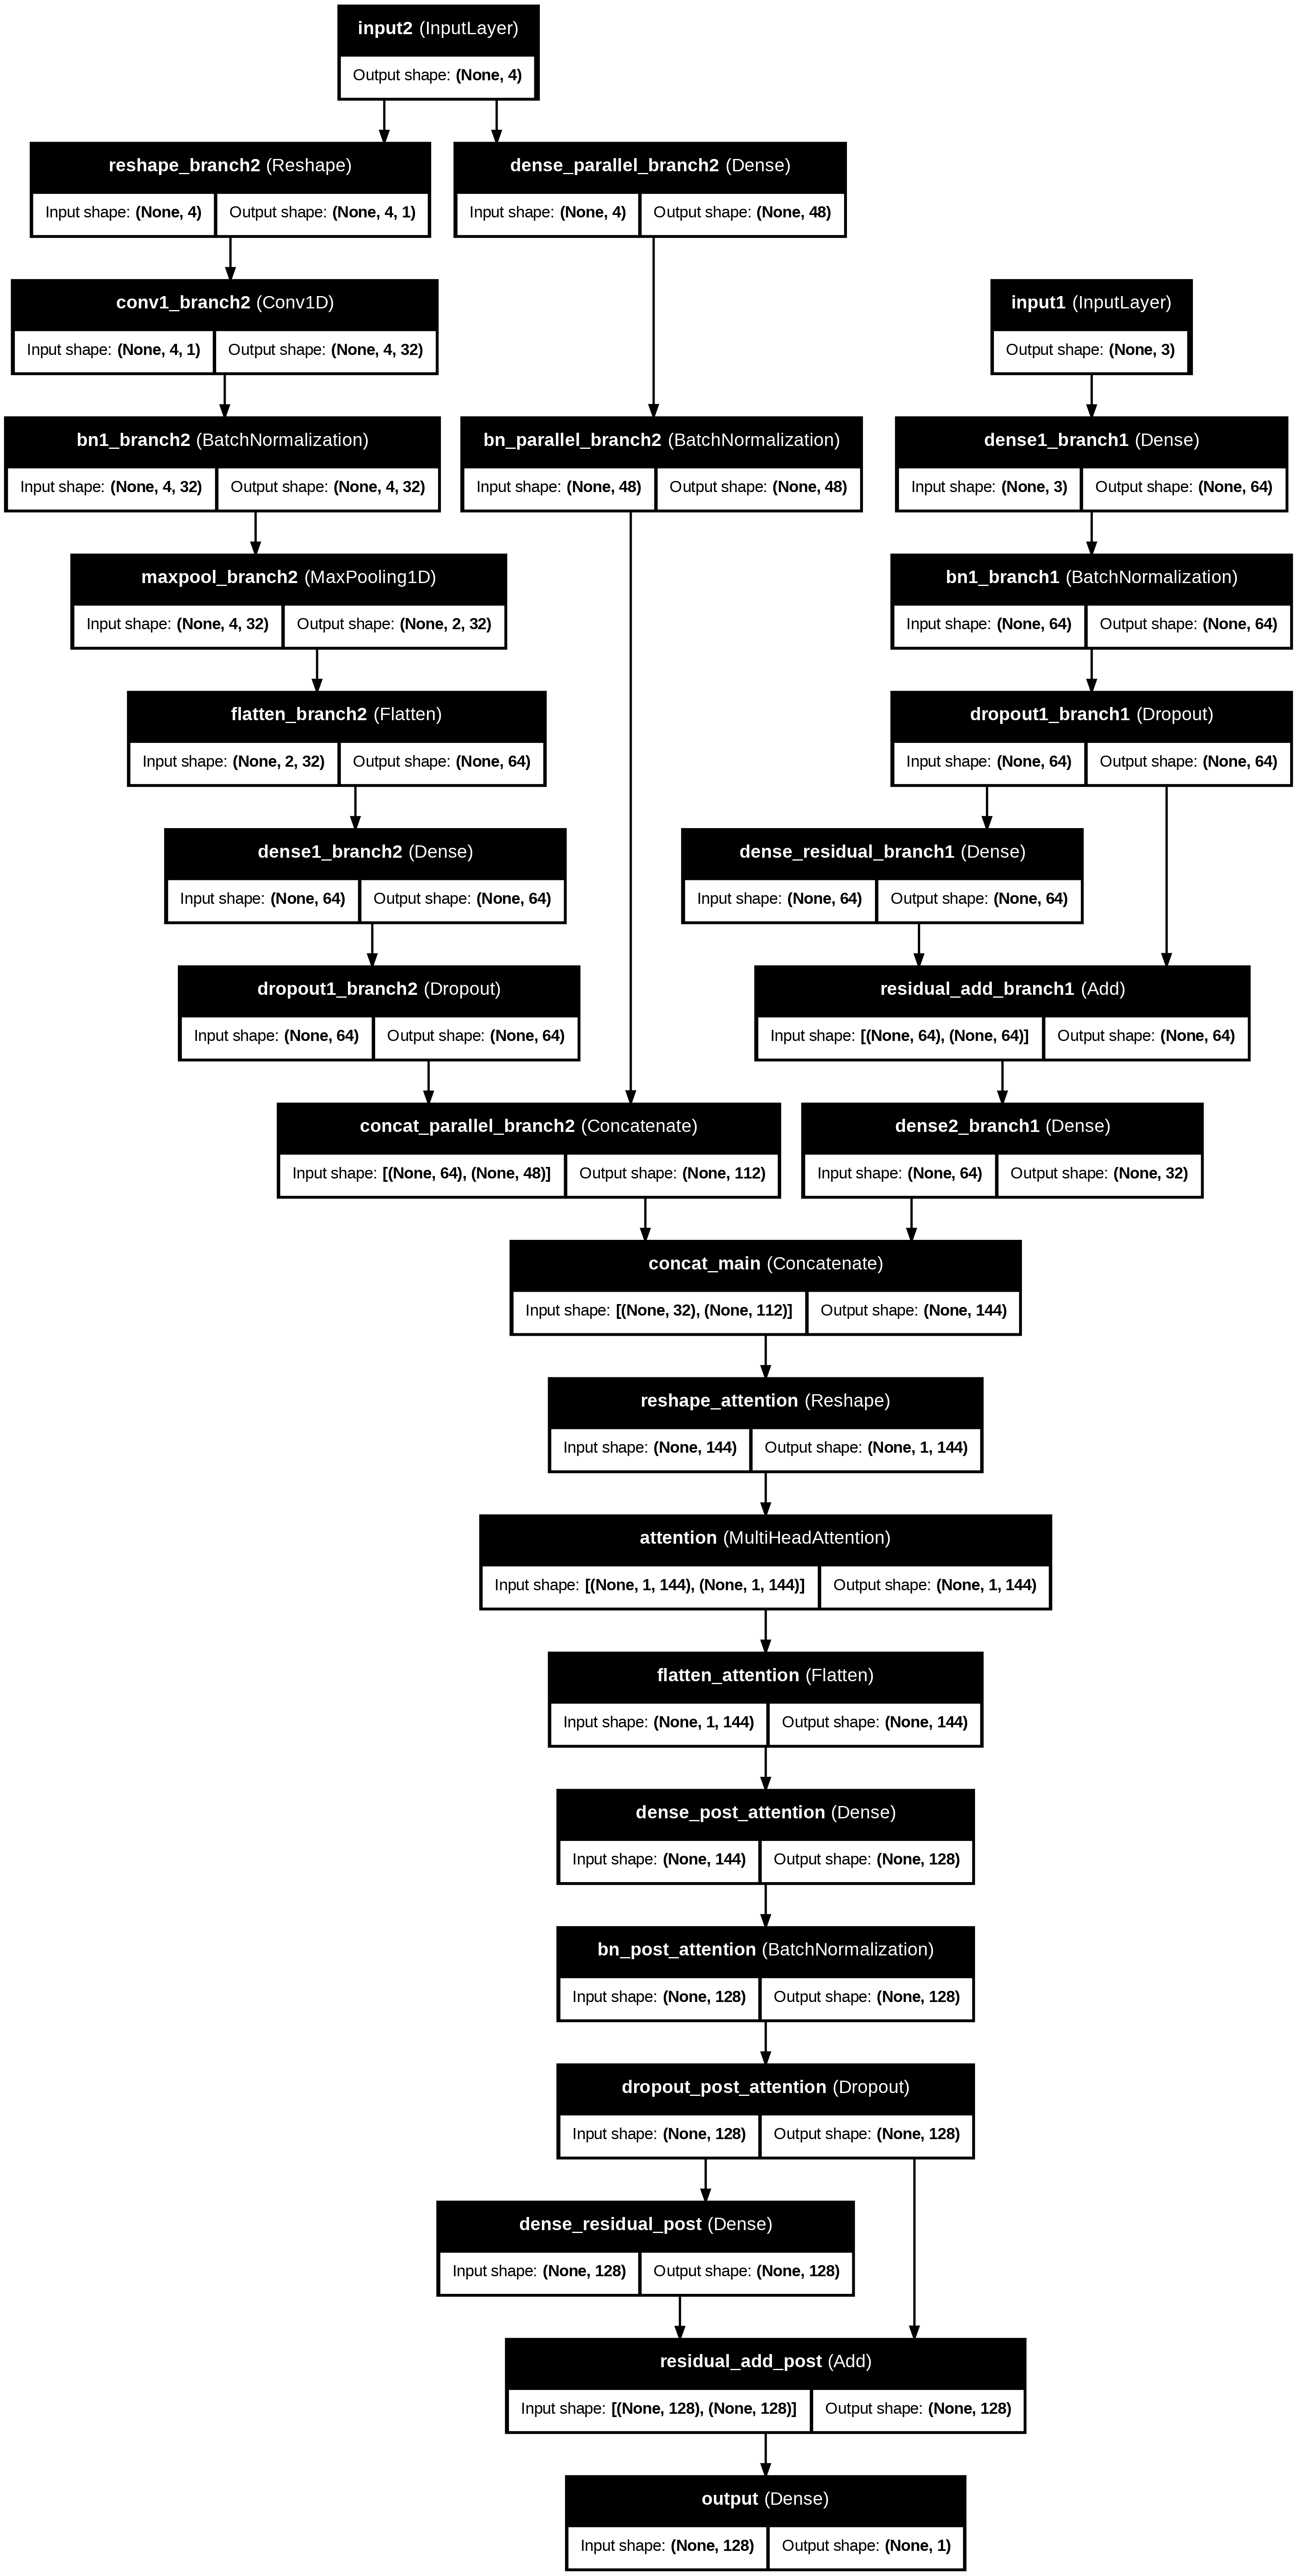

In [ ]:
# Plot model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, rankdir='TB')

# **Arsitektur Model**

**CNN (Convolutional Neural Network)**

 jenis model deep learning yang sangat efektif untuk mengolah data gambar dan data spasial. Cara kerja CNN melibatkan lapisan konvolusi untuk mengekstraksi fitur penting dari gambar, seperti tepi, pola, dan tekstur, dengan menggunakan filter atau kernel yang bergerak di seluruh gambar. Hasil dari lapisan konvolusi ini kemudian diproses lebih lanjut oleh lapisan pooling untuk mengurangi dimensi data dan memilih fitur paling penting. CNN banyak digunakan pada data berupa gambar (misalnya, gambar RGB atau grayscale), video, atau data yang memiliki struktur spasial, seperti citra medis, pengenalan wajah, dan deteksi objek. Model ini sangat efektif karena mampu menangkap hierarki fitur dalam data spasial dengan menggunakan parameter yang relatif sedikit, membuatnya efisien untuk aplikasi visi komputer.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),  # Layer konvolusional pertama, 32 filter, ukuran 3x3
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling untuk mengurangi dimensi
    Conv2D(64, (3, 3), activation='relu'),  # Layer konvolusional kedua, 64 filter, ukuran 3x3

    MaxPooling2D(pool_size=(2, 2)),  # Max pooling lagi untuk mengurangi dimensi
    Flatten(),  # Mengubah output menjadi 1D untuk layer Dense
    Dense(128, activation='relu'),  # Layer Dense dengan 128 neuron dan aktivasi ReLU
    Dense(10, activation='softmax')  # Layer Dense output, 10 neuron untuk 10 kelas, aktivasi softmax
])

 **RNN(Recurrent Neural Network)**

 dirancang untuk menangani data yang memiliki urutan atau dimensi waktu, seperti teks, ucapan, dan data deret waktu. Berbeda dengan jaringan neural tradisional yang hanya mengolah input statis, RNN memiliki loop yang memungkinkan informasi untuk "berulang" dalam jaringan, sehingga model dapat mengingat informasi sebelumnya. Hal ini menjadikan RNN sangat cocok untuk tugas-tugas seperti prediksi urutan, pemrosesan bahasa alami (NLP), dan analisis deret waktu. RNN digunakan pada data berupa urutan waktu, seperti teks (untuk analisis sentimen atau terjemahan otomatis), sinyal suara (untuk pengenalan suara), dan data sensor (misalnya, sensor suhu atau cuaca).

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([
    SimpleRNN(64, input_shape=(100, 1)),  # Layer SimpleRNN dengan 64 unit, input sequence panjang 100 dan 1 fitur per waktu
    Dense(1, activation='sigmoid')  # Layer Dense output dengan 1 neuron dan aktivasi sigmoid untuk klasifikasi biner
])


**LSTM (Long Short-Term Memory)**

dirancang untuk mengatasi masalah vanishing gradient, yang sering muncul pada RNN standar ketika mengolah urutan yang panjang. LSTM menggunakan mekanisme yang disebut "gates" untuk mengontrol aliran informasi, memungkinkan jaringan untuk mengingat informasi penting dalam waktu lebih lama. LSTM banyak digunakan dalam aplikasi yang membutuhkan pemahaman urutan panjang, seperti penerjemahan bahasa, analisis teks, dan prediksi harga saham. LSTM cocok untuk data berurutan yang memiliki ketergantungan jangka panjang, seperti deret waktu yang panjang atau urutan kata dalam kalimat.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, input_shape=(100, 1)),  # Layer LSTM dengan 64 unit, input sequence panjang 100, 1 fitur per waktu
    Dense(1, activation='sigmoid')  # Layer output dengan 1 neuron, aktivasi sigmoid untuk klasifikasi biner
])

**GRU (Gated Recurrent Unit)**

varian dari RNN yang bertujuan untuk mengatasi masalah vanishing gradient dengan menggunakan mekanisme gating, yang mirip dengan LSTM. GRU memiliki dua jenis gate utama: update gate dan reset gate, yang mengontrol informasi mana yang perlu dipertahankan dan yang harus dilupakan pada setiap langkah waktu. GRU lebih sederhana dibandingkan LSTM karena hanya memiliki dua gate, menjadikannya lebih efisien dalam hal komputasi. GRU sering digunakan untuk tugas yang melibatkan data urutan waktu seperti pemrosesan bahasa alami (NLP), prediksi deret waktu, dan analisis urutan data. Model ini efektif pada urutan yang tidak terlalu panjang dan membutuhkan pelatihan yang lebih cepat dibandingkan LSTM.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

model = Sequential([
    GRU(64, input_shape=(100, 1)),  # Layer GRU dengan 64 unit, input sequence panjang 100, 1 fitur per waktu
    Dense(1, activation='sigmoid')  # Layer output dengan 1 neuron, aktivasi sigmoid untuk klasifikasi biner
])

**GAN (Generative Adversarial Network)**

**Hanya bagian Generator dan Discriminator**

terdiri dari dua jaringan neural: generator dan discriminator. Generator bertugas membuat data palsu, sedangkan discriminator berfungsi untuk membedakan antara data asli dan palsu. Kedua model ini berkompetisi satu sama lain, meningkatkan kinerja keduanya dalam proses yang disebut adversarial training. GAN digunakan untuk menghasilkan data baru yang mirip dengan data yang ada, seperti menghasilkan gambar atau video baru, membuat musik, atau menghasilkan teks. Model ini sering digunakan dalam pembuatan gambar atau video sintetik, augmentasi data, dan dalam aplikasi desain kreatif, seperti menciptakan karya seni atau konten digital baru.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Flatten

# Generator
generator = Sequential([
    Dense(128, input_dim=100),  # Layer Dense pertama dengan 128 neuron, input dimensi 100 (noise)
    LeakyReLU(0.2),  # Aktivasi LeakyReLU dengan slope 0.2
    Dense(784, activation='tanh'),  # Layer Dense untuk menghasilkan output dengan 784 neuron (28x28 gambar)
    Reshape((28, 28, 1))  # Mengubah output menjadi bentuk gambar 28x28 dengan 1 channel (grayscale)
])

# Discriminator
discriminator = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten input image 28x28 menjadi vektor 1D
    Dense(128),  # Layer Dense dengan 128 neuron
    LeakyReLU(0.2),  # Aktivasi LeakyReLU dengan slope 0.2
    Dense(1, activation='sigmoid')  # Layer output dengan 1 neuron dan aktivasi sigmoid untuk klasifikasi (real/fake)
])

**Autoencoder**

 jenis jaringan neural yang digunakan untuk melakukan pembelajaran tanpa pengawasan, dengan tujuan mengompresi input menjadi representasi lebih rendah (encoding) dan kemudian mencoba merekonstruksi input tersebut (decoding). Autoencoders sangat berguna dalam pengurangan dimensi, deteksi anomali, dan pengenalan pola. Mereka dapat digunakan pada data yang memerlukan pengurangan dimensi, seperti gambar, sinyal suara, dan teks. Misalnya, autoencoders digunakan untuk menghilangkan noise dalam gambar (denoising) atau untuk memampatkan data besar menjadi bentuk yang lebih ringkas untuk analisis lebih lanjut.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_layer = Input(shape=(784,))  # Input layer dengan shape 784 (biasanya untuk gambar 28x28 yang diratakan)
encoded = Dense(64, activation='relu')(input_layer)  # Layer encoder dengan 64 neuron dan aktivasi ReLU
decoded = Dense(784, activation='sigmoid')(encoded)  # Layer decoder dengan 784 neuron (output gambar kembali) dan aktivasi sigmoid
autoencoder = Model(inputs=input_layer, outputs=decoded)  # Model autoencoder dengan input dan output yang ditentukan

**Transformer (dengan layer bawaan)**

Transformer adalah arsitektur model yang digunakan dalam pemrosesan bahasa alami (NLP) dan tugas-tugas lain yang melibatkan urutan, seperti penerjemahan otomatis, analisis sentimen, dan summarization. Berbeda dengan RNN dan LSTM, Transformer menggunakan mekanisme self-attention yang memungkinkan model untuk fokus pada bagian penting dari input, terlepas dari posisi dalam urutan. Ini membuat Transformer lebih efisien dan efektif dalam menangani urutan yang sangat panjang. Transformer digunakan pada data urutan panjang seperti teks dalam penerjemahan bahasa (misalnya, Google Translate) dan model bahasa besar (misalnya, GPT dan BERT) yang dapat digunakan untuk berbagai aplikasi NLP.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dropout

input_layer = Input(shape=(None, 64))  # Input layer dengan shape (None, 64), None berarti panjang urutan fleksibel, 64 adalah dimensi fitur
attention_output = MultiHeadAttention(num_heads=2, key_dim=64)(input_layer, input_layer)  # Multi-head attention dengan 2 kepala dan dimensi kunci 64
attention_output = Dropout(0.1)(attention_output)  # Dropout layer dengan rate 0.1 untuk mencegah overfitting
attention_output = LayerNormalization(epsilon=1e-6)(input_layer + attention_output)  # Normalisasi layer dengan epsilon kecil untuk stabilitas numerik
output = Dense(10, activation='softmax')(attention_output)  # Layer output dengan 10 neuron, aktivasi softmax untuk klasifikasi multi-kelas

model = Model(inputs=input_layer, outputs=output)  # Model dengan input dan output yang telah ditentukan

**BERT (Menggunakan model pre-trained dari transformers)**

 berbasis arsitektur Transformer yang dirancang untuk tugas-tugas pemrosesan bahasa alami (NLP). Apa yang membedakan BERT adalah pendekatannya yang bidirectional, yang berarti model ini mempertimbangkan konteks dari kedua arah (kiri dan kanan) dalam teks untuk memahami makna suatu kata atau frasa dengan lebih baik. BERT dilatih dengan dua teknik utama: masked language modeling (MLM) dan next sentence prediction (NSP). MLM melibatkan penghilangan kata-kata tertentu dalam kalimat untuk diprediksi, sementara NSP melatih model untuk memprediksi apakah dua kalimat berturut-turut memiliki hubungan yang logis. BERT sangat kuat dalam berbagai tugas NLP, seperti analisis sentimen, penamaan entitas, dan pertanyaan jawaban. BERT telah menjadi dasar bagi banyak model NLP terkini, seperti RoBERTa, ALBERT, dan lainnya.

In [ ]:
from transformers import TFBertModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

bert = TFBertModel.from_pretrained("bert-base-uncased")  # Memuat model BERT yang telah dilatih sebelumnya

input_ids = Input(shape=(128,), dtype='int32')  # Input untuk ID token dengan panjang urutan 128
attention_mask = Input(shape=(128,), dtype='int32')  # Input untuk attention mask dengan panjang urutan 128
bert_output = bert(input_ids, attention_mask=attention_mask)[1]  # Mendapatkan output BERT, indeks [1] untuk output hidden states
output = Dense(1, activation='sigmoid')(bert_output)  # Layer output dengan 1 neuron dan aktivasi sigmoid untuk klasifikasi biner

model = Model(inputs=[input_ids, attention_mask], outputs=output)  # Model dengan input (input_ids, attention_mask) dan output

**ResNet (menggunakan arsitektur prebuilt)**

arsitektur jaringan deep learning yang sangat dalam, yang memperkenalkan skip connections atau residual connections untuk mengatasi masalah degradasi performa saat jaringan semakin dalam. Residual connections memungkinkan gradien untuk mengalir dengan lebih efisien melalui lapisan-lapisan yang dalam, sehingga membantu pelatihan model yang sangat dalam (lebih dari seratus lapisan). Dengan demikian, ResNet mampu mempelajari fitur yang lebih kompleks tanpa mengalami overfitting atau hilangnya informasi selama pelatihan. ResNet banyak digunakan untuk aplikasi visi komputer, seperti klasifikasi gambar, deteksi objek, dan segmentasi citra. Model ini sangat efektif dalam data gambar yang kompleks dan memiliki arsitektur yang dalam, seperti pengenalan wajah atau identifikasi objek dalam citra satelit.

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input

base_model = ResNet50(include_top=False, input_shape=(224, 224, 3))  # Memuat model ResNet50 tanpa lapisan klasifikasi akhir (include_top=False) dan input 224x224x3 (gambar RGB)
x = Flatten()(base_model.output)  # Meratakan output dari base model (ResNet50) untuk memasuki layer Dense
x = Dense(10, activation='softmax')(x)  # Layer Dense dengan 10 neuron dan aktivasi softmax untuk klasifikasi multi-kelas

model = Model(inputs=base_model.input, outputs=x)  # Model dengan input dari base_model dan output dari layer Dense

**UNet (penyusunan dasar)**

 dirancang khusus untuk segmentasi gambar, terutama dalam aplikasi medis seperti segmentasi jaringan tubuh atau organ pada gambar medis (misalnya, CT scan, MRI). U-Net terdiri dari dua bagian utama: contracting path dan expansive path. Contracting path berfungsi untuk mengekstrak fitur dari gambar, sedangkan expansive path memperbesar representasi fitur tersebut kembali ke ukuran gambar asli. Salah satu fitur unik dari U-Net adalah skip connections, yang menghubungkan lapisan-lapisan dalam contracting path dengan lapisan-lapisan dalam expansive path untuk menjaga detail spasial gambar selama pemrosesan. U-Net sangat efektif untuk segmentasi citra medis karena mampu menghasilkan output yang sangat terperinci, yang penting untuk mendeteksi area-area spesifik dalam gambar medis. U-Net digunakan dalam berbagai aplikasi segmentasi gambar, seperti deteksi tumor, identifikasi organ tubuh, dan lainnya.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

inputs = Input(shape=(128, 128, 1))  # Input layer dengan shape 128x128 piksel dan 1 channel (grayscale)
c1 = Conv2D(64, (3,3), activation='relu', padding='same')(inputs)  # Layer konvolusi pertama dengan 64 filter, kernel 3x3, aktivasi ReLU, dan padding 'same'
p1 = MaxPooling2D((2,2))(c1)  # Max pooling dengan ukuran pool 2x2 untuk mengurangi dimensi spatial

c2 = Conv2D(128, (3,3), activation='relu', padding='same')(p1)  # Layer konvolusi kedua dengan 128 filter
u1 = UpSampling2D((2,2))(c2)  # Upsampling dengan faktor 2x2 untuk meningkatkan dimensi spatial
merge1 = concatenate([c1, u1])  # Menggabungkan output dari c1 dan u1 (skip connection)
outputs = Conv2D(1, (1,1), activation='sigmoid')(merge1)  # Layer konvolusi output dengan 1 filter (output grayscale) dan aktivasi sigmoid untuk segmentasi

model = Model(inputs=inputs, outputs=outputs)  # Membuat model dengan input dan output yang telah ditentukan

# **Tipe**

**Regresi**

In [ ]:
import pandas as pd
import numpy as np

data = {
    'luas_bangunan': [70, 85, 60, 120, 90],
    'jumlah_kamar': [3, 4, 2, 5, 3],
    'usia_rumah': [5, 10, 20, 3, 8],
    'jarak_ke_kota': [10, 7, 15, 5, 8],
    'harga_rumah': [350, 420, 300, 600, 480],
    'Rating_rumah' : [4,5,3,5,4]
}
df = pd.DataFrame(data)

X = df[['luas_bangunan', 'jumlah_kamar', 'usia_rumah', 'jarak_ke_kota']].values
y = df[['harga_rumah', 'Rating_rumah']].values

df

,luas_bangunan,jumlah_kamar,usia_rumah,jarak_ke_kota,harga_rumah,Rating_rumah
0,70,3,5,10,350,4
1,85,4,10,7,420,5
2,60,2,20,15,300,3
3,120,5,3,5,600,5
4,90,3,8,8,480,4


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(8, activation='relu', input_shape=(4,)),  # Layer hidden pertama dengan 8 neuron, input 4 fitur (lauas, jumlah kamar, usia, jarak ke kota)
    Dense(4, activation='relu'),                     # Layer hidden kedua dengan 4 neuron
    Dense(2, activation='linear')                    # Output layer dengan 2 neuron karena output 2 (harga, rating)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86 (344.00 B)

 Trainable params: 86 (344.00 B)

 Non-trainable params: 0 (0.00 B)

**Klasifikasi**

In [ ]:
import pandas as pd
import numpy as np

data = {
    'Usia': [45, 50, 35, 29, 60],
    'Tekanan_Darah': [130, 140, 120, 110, 150],
    'Kolesterol': [230, 250, 190, 180, 260],
    'Denyut_Jantung': [85, 90, 75, 70, 95],
    'Risiko': [1, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

X = df[['Usia', 'Tekanan_Darah', 'Kolesterol', 'Denyut_Jantung']].values
y = df['Risiko'].values

df

,Usia,Tekanan_Darah,Kolesterol,Denyut_Jantung,Risiko
0,45,130,230,85,1
1,50,140,250,90,1
2,35,120,190,75,0
3,29,110,180,70,0
4,60,150,260,95,1


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(4, input_shape=(4,), activation='relu'),  # Hidden layer 1, 4 neuron, input 4 fitur
    Dense(3, activation='relu'),                    # Hidden layer 2, 3 neuron : menyaring informasi penting
    Dense(1, activation='sigmoid')                  # Output layer, 1 neuron, aktivasi sigmoid : hasil klasifikasi
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39 (156.00 B)

 Trainable params: 39 (156.00 B)

 Non-trainable params: 0 (0.00 B)

**Data :** Ada 5 kolom, 3 kolom dari kiri sebagai variabel independen lalau 2 kolom dari kanan sebagai variabel dependen (kolomn D1 : output biner 1,0 | kolom D2 : output multi class 1,2,3)

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

X_dummy = np.random.rand(100, 3)  # 100 baris, 3 fitur
y_biner = np.random.choice([0, 1], size=(100,))
y_multiclass = np.random.choice([1, 2, 3], size=(100,))

df = pd.DataFrame(X_dummy, columns=['fitur_1', 'fitur_2', 'fitur_3'])
df['output_biner'] = y_biner
df['output_multiclass'] = y_multiclass

df.head()

,fitur_1,fitur_2,fitur_3,output_biner,output_multiclass
0,0.374540,0.950714,0.731994,0,2
1,0.598658,0.156019,0.155995,1,1
2,0.058084,0.866176,0.601115,1,1
3,0.708073,0.020584,0.969910,1,1
4,0.832443,0.212339,0.181825,0,3


In [ ]:
df.shape

(100, 5)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Input layer 3 fitur
inputs = Input(shape=(3,)) # 3 karena ada 3 variabel sebagai variabel independen

# Hidden layer contoh
x = Dense(10, activation='relu')(inputs)

# Output 1: biner
output_biner = Dense(1, activation='sigmoid', name='output_biner')(x) # biarpun ada 2 kelas tetapi neuron 1 untuk efisiensi dengan konsep sigmoid

# Output 2: multi-kelas (3 kelas)
output_multiclass = Dense(3, activation='softmax', name='output_multiclass')(x) # Karena 3 maka neuron 3

# Model dengan 2 output
model = Model(inputs=inputs, outputs=[output_biner, output_multiclass])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 8)         │         32 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_biner        │ (None, 1)         │          9 │ dense[0][0]       │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_multiclass   │ (None, 3)         │         27 │ dense[0][0]       │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 68 (272.00 B)

 Trainable params: 68 (272.00 B)

 Non-trainable params: 0 (0.00 B)

**Konsep Shape :**
- (100, 5) : 100 baris dengan 3 kolom -> 100 baris vektor dengan 3 elemen
- (100, 5, 5) -> 100 baris matriks 5x5

In [ ]:
np.random.seed(42)

# Data dummy
np.random.seed(42)
X_dummy = np.random.rand(100, 3)
y_biner = np.random.choice([0, 1], size=(100,))
y_multiclass = np.random.choice([1, 2, 3], size=(100,))

# Buat DataFrame
df = pd.DataFrame(X_dummy, columns=['fitur_1', 'fitur_2', 'fitur_3'])
df['output_biner'] = y_biner
df['output_multiclass'] = y_multiclass

# Konversi ke array dan reshape ke (100, 1, 5)
data_array = df.to_numpy()               # shape: (100, 5)
data_reshaped = data_array.reshape(100, 1, 5)  # shape: (100, 1, 5)

data_reshaped

Matriks 1x5 itu sama seperti vektor 5 elemen

In [ ]:
print(data_reshaped.shape)

(100, 1, 5)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Input layer 3 fitur
inputs = Input(shape=(1, 3)) # ambil dari (100, 1, 5) karena di 5 itu ada 3 variabel independen maka ambil 3, untuk 1 ambil dari yang tengah

# Hidden layer contoh
x = Dense(10, activation='relu')(inputs)

# Output 1: biner
output_biner = Dense(1, activation='sigmoid', name='output_biner')(x) # biarpun ada 2 kelas tetapi neuron 1 untuk efisiensi dengan konsep sigmoid

# Output 2: multi-kelas (3 kelas)
output_multiclass = Dense(3, activation='softmax', name='output_multiclass')(x) # Karena 3 maka neuron 3

# Model dengan 2 output
model = Model(inputs=inputs, outputs=[output_biner, output_multiclass])